In [1]:
import pickle
from pathlib import Path

In [2]:
def get_all_hops_flattened(results_list, key):
    return [hop for result in results_list for hop in result[key]]

In [3]:
def unfold_hop_lists_in_flattened_results_dict(l, unfold_key1="hops", unfold_key2="graph_normalized_hops"):
    result = []

    for element in l:
        for best_hop_pos, (hop, normalized_hop) in enumerate(zip(element[unfold_key1], element[unfold_key2])):
            cur_element = element.copy()
            cur_element[unfold_key1] = hop
            cur_element[unfold_key2] = normalized_hop
            cur_element["best_hop_pos"] = best_hop_pos
            result.append(cur_element)

    return result

In [4]:
with Path("multiple_centers_rumor_center_result_multiple_metrics_until104.pickle").open("rb") as f:
    results = pickle.load(f)

In [5]:
with Path("multiple_centers_rumor_center_result_single_cluster.pickle").open("rb") as f:
    single_cluster_result = pickle.load(f)
    results.extend(single_cluster_result)

In [6]:
for i, x in enumerate(results):
    if x is None:
        print(f"is None")
        del results[i]

is None
is None
is None
is None
is None
is None
is None
is None
is None
is None
is None
is None
is None


In [7]:
import pandas as pd

df = pd.DataFrame(results)
df

hops graph_normalized_hops  diameter  num_infection_centers  \
0     [2, 2]            [0.4, 0.4]         5                      2   
1     [1, 3]          [0.25, 0.75]         4                      2   
2     [2, 3]            [0.4, 0.6]         5                      2   
3     [2, 2]            [0.4, 0.4]         5                      2   
4     [1, 2]           [0.25, 0.5]         4                      2   
...      ...                   ...       ...                    ...   
7982     [2]                 [0.4]         5                      1   
7983     [1]                [0.25]         4                      1   
7984     [2]                 [0.4]         5                      1   
7985     [1]                 [0.5]         2                      1   
7986     [1]                [0.25]         4                      1   

      infection_prob  max_infected_nodes  \
0                0.3                 500   
1                0.3                 500   
2                0.3                 500   
3                0.3                 500   
4                0.3                 500   
...              ...                 ...   
7982             0.3                1000   
7983             0.3                1000   
7984             0.3                1000   
7985             0.3                1000   
7986             0.3                1000   

                                            predictions ground_truths  \
0     [[1, 24, 59, 68, 102, 170, 226, 324, 350, 392,...   [333, 3542]   
1     [[1, 2, 16, 18, 27, 106, 122, 148, 178, 344, 3...  [1056, 5432]   
2     [[2, 3, 7, 10, 11, 12, 13, 44, 173, 373, 443, ...  [2928, 3163]   
3     [[51, 117, 506, 537, 758, 1299, 1455, 12, 25, ...  [1863, 6296]   
4     [[9, 10, 31, 40, 55, 115, 143, 150, 183, 209, ...   [689, 6434]   
...                                                 ...           ...   
7982                                              [[0]]         [709]   
7983                                              [[2]]        [2109]   
7984                                              [[0]]        [5350]   
7985                                              [[9]]        [2782]   
7986                                              [[9]]        [1445]   

                         graph               metric  
0     synthetic_internet_10000     rumor_centrality  
1     synthetic_internet_10000     rumor_centrality  
2     synthetic_internet_10000     rumor_centrality  
3     synthetic_internet_10000     rumor_centrality  
4     synthetic_internet_10000     rumor_centrality  
...                        ...                  ...  
7982                  internet  distance_centrality  
7983                  internet  distance_centrality  
7984                  internet  distance_centrality  
7985                  internet  distance_centrality  
7986                  internet  distance_centrality  

[7987 rows x 10 columns]

In [8]:
df = pd.DataFrame(unfold_hop_lists_in_flattened_results_dict(results))
df

hops  graph_normalized_hops  diameter  num_infection_centers  \
0         2                   0.40         5                      2   
1         2                   0.40         5                      2   
2         1                   0.25         4                      2   
3         3                   0.75         4                      2   
4         2                   0.40         5                      2   
...     ...                    ...       ...                    ...   
28704     2                   0.40         5                      1   
28705     1                   0.25         4                      1   
28706     2                   0.40         5                      1   
28707     1                   0.50         2                      1   
28708     1                   0.25         4                      1   

       infection_prob  max_infected_nodes  \
0                 0.3                 500   
1                 0.3                 500   
2                 0.3                 500   
3                 0.3                 500   
4                 0.3                 500   
...               ...                 ...   
28704             0.3                1000   
28705             0.3                1000   
28706             0.3                1000   
28707             0.3                1000   
28708             0.3                1000   

                                             predictions ground_truths  \
0      [[1, 24, 59, 68, 102, 170, 226, 324, 350, 392,...   [333, 3542]   
1      [[1, 24, 59, 68, 102, 170, 226, 324, 350, 392,...   [333, 3542]   
2      [[1, 2, 16, 18, 27, 106, 122, 148, 178, 344, 3...  [1056, 5432]   
3      [[1, 2, 16, 18, 27, 106, 122, 148, 178, 344, 3...  [1056, 5432]   
4      [[2, 3, 7, 10, 11, 12, 13, 44, 173, 373, 443, ...  [2928, 3163]   
...                                                  ...           ...   
28704                                              [[0]]         [709]   
28705                                              [[2]]        [2109]   
28706                                              [[0]]        [5350]   
28707                                              [[9]]        [2782]   
28708                                              [[9]]        [1445]   

                          graph               metric  best_hop_pos  
0      synthetic_internet_10000     rumor_centrality             0  
1      synthetic_internet_10000     rumor_centrality             1  
2      synthetic_internet_10000     rumor_centrality             0  
3      synthetic_internet_10000     rumor_centrality             1  
4      synthetic_internet_10000     rumor_centrality             0  
...                         ...                  ...           ...  
28704                  internet  distance_centrality             0  
28705                  internet  distance_centrality             0  
28706                  internet  distance_centrality             0  
28707                  internet  distance_centrality             0  
28708                  internet  distance_centrality             0  

[28709 rows x 11 columns]

In [36]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_mean_min_max(axis, xs, y_frame, color, name, title=""):
    axis.plot(xs, y_frame["mean"], "-o", color=color, label=name)
    axis.set_ylim(0, 1)
    # axis.plot(xs, y_frame["min"], "-", alpha=0.1, color=color)
    # axis.plot(xs, y_frame["max"], "-", alpha=0.1, color=color)
    # axis.fill_between(xs, y_frame["mean"],y_frame["min"], alpha=0.1, color=color)
    # axis.fill_between(xs, y_frame["mean"], y_frame["max"], alpha=0.1, color=color)
    # axis.legend()

    axis.set_xlabel("number of infection centers")
    axis.set_title(title)

In [10]:
results_per_graph_grouped = {}
for i in df["max_infected_nodes"].unique():
     # cur_frame = df.where(df["max_infected_nodes"] == i).dropna()
     results_per_graph_grouped[f"{i}"] = df.groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median"]})

In [11]:
grouped = df.groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median", "count"]})
grouped

hops  \
                                                                                    mean   
metric                 graph         max_infected_nodes num_infection_centers              
betweenness_centrality internet      500                1                       1.600000   
                                                        2                       1.710000   
                                                        3                       1.400000   
                                                        5                       1.232000   
                                                        7                       1.357143   
...                                                                                  ...   
rumor_centrality       us_power_grid 1000               1                      10.080000   
                                                        2                       9.900000   
                                                        3                      10.186667   
                                                        5                      12.508000   
                                                        7                      12.297143   

                                                                                   \
                                                                              min   
metric                 graph         max_infected_nodes num_infection_centers       
betweenness_centrality internet      500                1                       0   
                                                        2                       0   
                                                        3                       0   
                                                        5                       0   
                                                        7                       0   
...                                                                            ..   
rumor_centrality       us_power_grid 1000               1                       3   
                                                        2                       1   
                                                        3                       1   
                                                        5                       2   
                                                        7                       0   

                                                                                   \
                                                                              max   
metric                 graph         max_infected_nodes num_infection_centers       
betweenness_centrality internet      500                1                       4   
                                                        2                       4   
                                                        3                       3   
                                                        5                       3   
                                                        7                       3   
...                                                                            ..   
rumor_centrality       us_power_grid 1000               1                      19   
                                                        2                      21   
                                                        3                      23   
                                                        5                      29   
                                                        7                      30   

                                                                                      \
                                                                              median   
metric                 graph         max_infected_nodes num_infection_centers          
betweenness_centrality internet      500                1                        1.0   
                                                        2    

In [12]:
grouped.loc["betweenness_centrality"].loc["internet"].loc[500]["hops"]

mean  min  max  median
num_infection_centers                            
1                      1.600000    0    4     1.0
2                      1.710000    0    4     2.0
3                      1.400000    0    3     1.0
5                      1.232000    0    3     1.0
7                      1.357143    0    3     1.0

In [13]:
from itertools import product
from matplotlib import cm
import numpy as np

def plot_results(metric_name, graph_names, infected_nodes):
    infection_nums = df["num_infection_centers"].unique()

    if len(graph_names) == 0:
        graph_names = list(df["graph"].unique())

    if len(infected_nodes) == 0:
        infected_nodes = list(df["max_infected_nodes"].unique())

    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(f"Experiment results for different number of infection centers, metric: {metric_name}")

    axs = fig.subplots(2, 1)
    color = iter(cm.rainbow(np.linspace(0, 1, 10)))

    df_metric = grouped.loc[metric_name]

    for i, (graph_name, infection_node) in enumerate(product(graph_names, infected_nodes)):
        c = next(color)
        df_metric_graph = df_metric.loc[graph_name].loc[infection_node]
        plot_mean_min_max(axs[0], infection_nums, df_metric_graph["hops"], c, f"{graph_name}_infected_{infection_node}", title="hops")
        plot_mean_min_max(axs[1], infection_nums, df_metric_graph["graph_normalized_hops"], c, f"{graph_name}_infected_{infection_node}", title="graph normalized hops (by graph diameter)")

    fig.tight_layout(h_pad=2)

In [14]:
def plot_against(metric_name_1, metric_name_2, graph_names, infected_nodes):
    infection_nums = df["num_infection_centers"].unique()

    if len(graph_names) == 0:
        graph_names = list(df["graph"].unique())

    if len(infected_nodes) == 0:
        infected_nodes = list(df["max_infected_nodes"].unique())

    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(f"Experiment results for different number of infection centers, metric: {metric_name_1} vs {metric_name_2}")

    axs = fig.subplots(2, 2)
    color = list(cm.rainbow(np.linspace(0, 1, 10)))

    df_metric_1 = grouped.loc[metric_name_1]
    df_metric_2 = grouped.loc[metric_name_2]

    for i, (graph_name, infection_node) in enumerate(product(graph_names, infected_nodes)):
        c = color[i]
        df_metric_graph = df_metric_1.loc[graph_name].loc[infection_node]
        plot_mean_min_max(axs[0][0], infection_nums, df_metric_graph["hops"], c, f"{graph_name}_infected_{infection_node}", title="hops")
        plot_mean_min_max(axs[1][0], infection_nums, df_metric_graph["graph_normalized_hops"], c, f"{graph_name}_infected_{infection_node}", title="graph normalized hops (by graph diameter)")

    for i, (graph_name, infection_node) in enumerate(product(graph_names, infected_nodes)):
        c = color[i]
        df_metric_graph = df_metric_2.loc[graph_name].loc[infection_node]
        plot_mean_min_max(axs[0][1], infection_nums, df_metric_graph["hops"], c, f"{graph_name}_infected_{infection_node}", title="hops")
        plot_mean_min_max(axs[1][1], infection_nums, df_metric_graph["graph_normalized_hops"], c, f"{graph_name}_infected_{infection_node}", title="graph normalized hops (by graph diameter)")

    fig.tight_layout(h_pad=2)

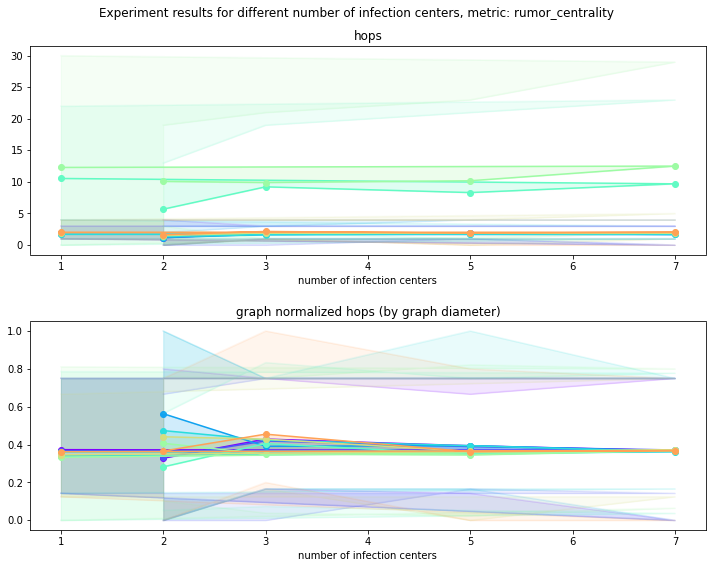

In [15]:
plot_results("rumor_centrality", [], [])

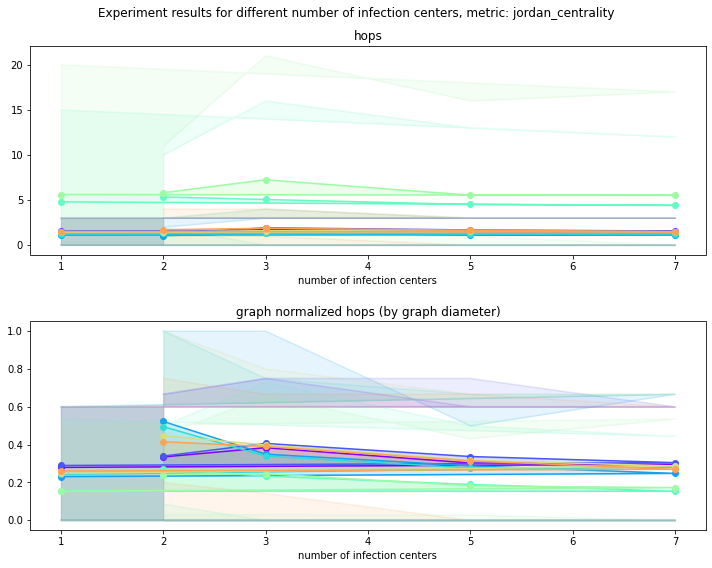

In [16]:
plot_results("jordan_centrality", [], [])

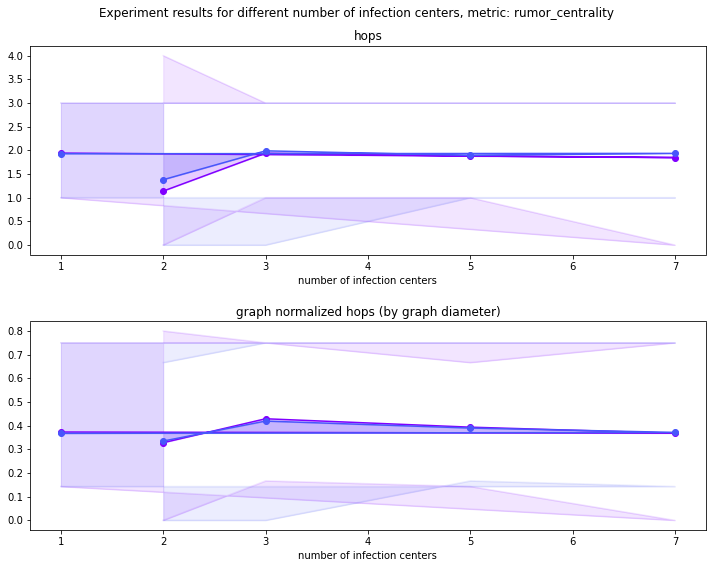

In [17]:
plot_results("rumor_centrality", ["synthetic_internet_10000"], [500, 1000])

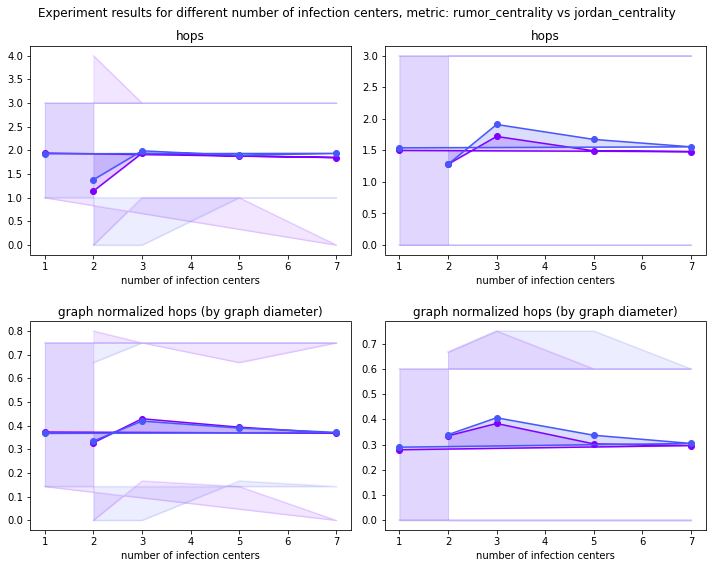

In [18]:
plot_against("rumor_centrality", "jordan_centrality", ["synthetic_internet_10000"], [500, 1000])

In [19]:
def plot_multiple_compare(metric_names, graph_names, infected_nodes, best_hop_poss = None):
    if best_hop_poss is None:
        grouped = df.groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median", "count"]})
    else:
        grouped = df[df["best_hop_pos"].isin(best_hop_poss)].groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median", "count"]})

    infection_nums = sorted(df["num_infection_centers"].unique())

    if len(graph_names) == 0:
        graph_names = list(df["graph"].unique())

    if len(infected_nodes) == 0:
        infected_nodes = list(df["max_infected_nodes"].unique())

    fig = plt.figure(figsize=(12, 6), constrained_layout=True)
    fig.suptitle(f"Experiment results for different number of infection centers\nmetric: {', '.join(metric_names)}\n{'' if best_hop_poss is None else 'Using best hops: '+ ', '.join(map(str, best_hop_poss))}", fontsize="x-large", y=1.2)

    # axs = fig.subplots(2, , sharex=True, sharey='row')
    color = list(cm.rainbow(np.linspace(0, 1, 10)))
    subfigs = fig.subfigures(2, 1)

    axsTop = subfigs[0].subplots(1, len(metric_names), sharey=True)
    axsBottom = subfigs[1].subplots(1, len(metric_names), sharey=True)

    subfigs[0].suptitle("Hops")
    subfigs[1].suptitle("Graph Normalized Hops (by graph diameter)")
    df_metrics = [grouped.loc[metric_name] for metric_name in metric_names]
    for metric_i, df_metric in enumerate(df_metrics):
        for i, (graph_name, infection_node) in enumerate(product(graph_names, infected_nodes)):
            c = color[i]
            df_metric_graph = df_metric.loc[graph_name].loc[infection_node]
            axsTop_metric = axsTop[metric_i] if len(metric_names) > 1 else axsTop
            axsBottom_metric = axsBottom[metric_i] if len(metric_names) > 1 else axsBottom
            plot_mean_min_max(axsTop_metric, infection_nums, df_metric_graph["hops"], c, f"{graph_name}_inf_{infection_node}")
            plot_mean_min_max(axsBottom_metric, infection_nums, df_metric_graph["graph_normalized_hops"], c, f"{graph_name}_inf_{infection_node}")

    if len(metric_names) > 1:
        handles, labels = axsBottom[-1].get_legend_handles_labels()
    else:
        handles, labels = axsBottom.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.55, -0.09))
    # fig.tight_layout(h_pad=2)

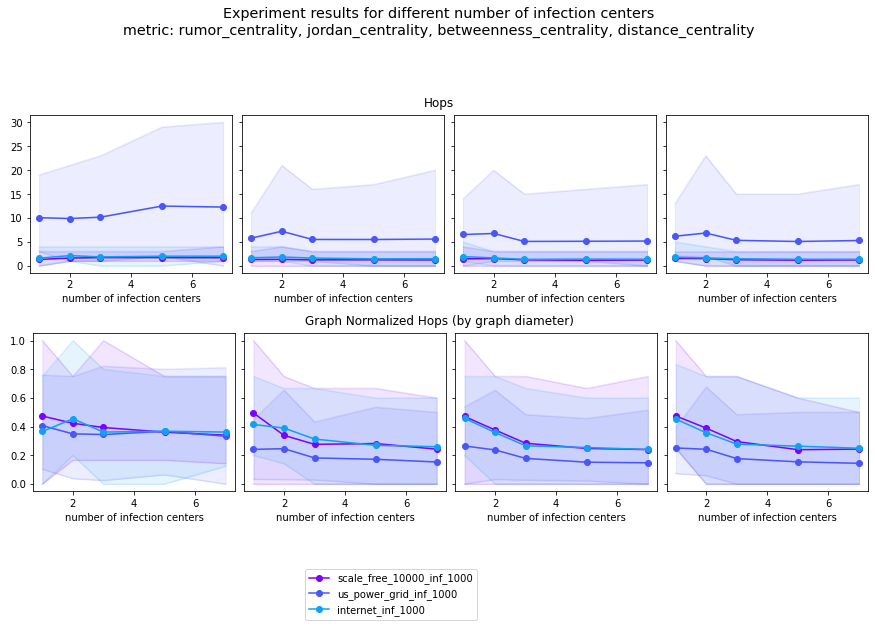

In [20]:
plot_multiple_compare(["rumor_centrality", "jordan_centrality", "betweenness_centrality", "distance_centrality"], ["scale_free_10000", "us_power_grid", "internet"], [1000])

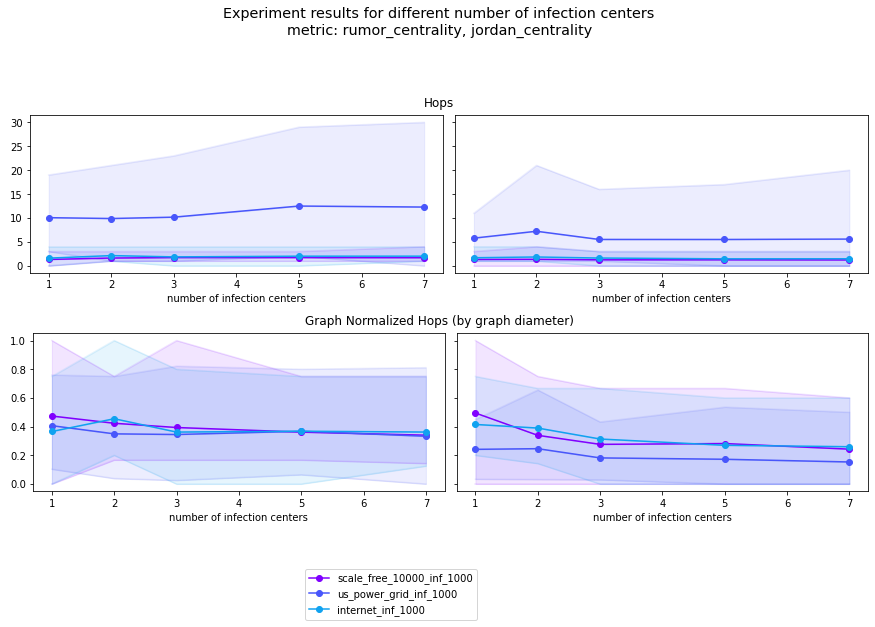

In [21]:
plot_multiple_compare(["rumor_centrality", "jordan_centrality"], ["scale_free_10000", "us_power_grid", "internet"], [1000])

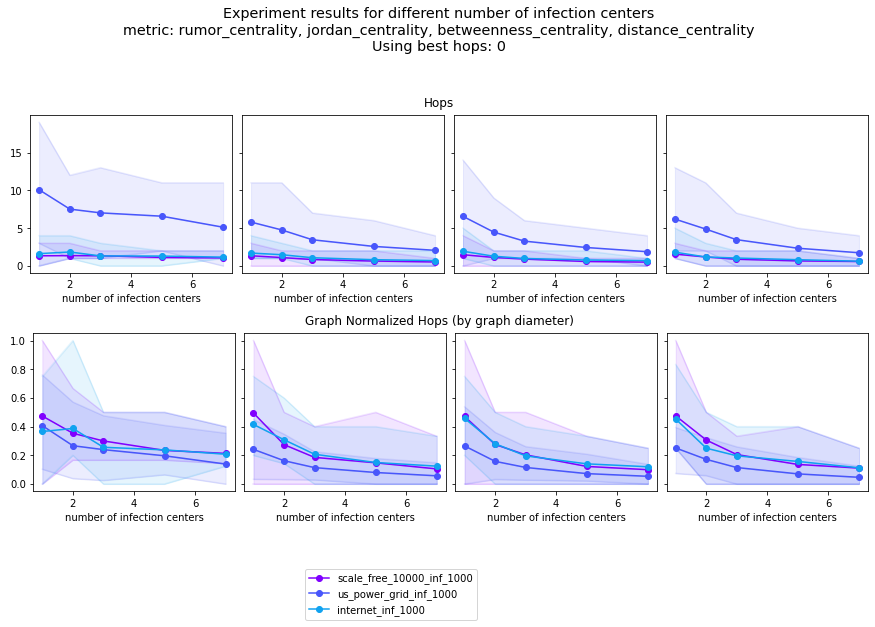

In [22]:
plot_multiple_compare(["rumor_centrality", "jordan_centrality", "betweenness_centrality", "distance_centrality"], ["scale_free_10000", "us_power_grid", "internet"], [1000], best_hop_poss=[0])

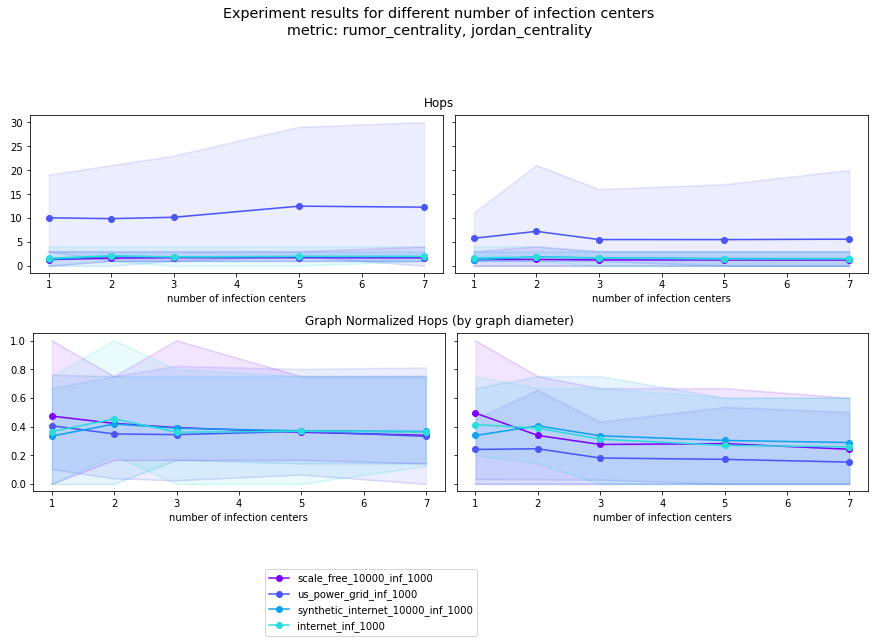

In [23]:
plot_multiple_compare(["rumor_centrality", "jordan_centrality"], ["scale_free_10000", "us_power_grid", "synthetic_internet_10000", "internet"], [1000])

In [24]:
df[df["best_hop_pos"].isin(range(2,8))].groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median", "count"]})

hops  \
                                                                                    mean   
metric                 graph         max_infected_nodes num_infection_centers              
betweenness_centrality internet      500                3                       1.960000   
                                                        5                       1.526667   
                                                        7                       1.584000   
                                     1000               3                       1.840000   
                                                        5                       1.760000   
...                                                                                  ...   
rumor_centrality       us_power_grid 500                5                      11.886667   
                                                        7                      12.538776   
                                     1000               3                      13.520000   
                                                        5                      15.206667   
                                                        7                      14.460000   

                                                                                   \
                                                                              min   
metric                 graph         max_infected_nodes num_infection_centers       
betweenness_centrality internet      500                3                       1   
                                                        5                       1   
                                                        7                       0   
                                     1000               3                       1   
                                                        5                       1   
...                                                                            ..   
rumor_centrality       us_power_grid 500                5                       2   
                                                        7                       4   
                                     1000               3                       8   
                                                        5                       4   
                                                        7                       6   

                                                                                   \
                                                                              max   
metric                 graph         max_infected_nodes num_infection_centers       
betweenness_centrality internet      500                3                       3   
                                                        5                       3   
                                                        7                       3   
                                     1000               3                       3   
                                                        5                       3   
...                                                                            ..   
rumor_centrality       us_power_grid 500                5                      23   
                                                        7                      22   
                                     1000               3                      23   
                                                        5                      29   
                                                        7                      30   

                                                                                      \
                                                                              median   
metric                 graph         max_infected_nodes num_infection_centers          
betweenness_centrality internet      500                3                        2.0   
                                                        5    

In [25]:
from rumor_centrality.graph_generator import us_power_grid
from rumor_centrality.graph_visualization import plot_nx_graph

plot_nx_graph(us_power_grid())

In [26]:
grouped = df.groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median", "count"]})

In [27]:
grouped

hops  \
                                                                                    mean   
metric                 graph         max_infected_nodes num_infection_centers              
betweenness_centrality internet      500                1                       1.600000   
                                                        2                       1.710000   
                                                        3                       1.400000   
                                                        5                       1.232000   
                                                        7                       1.357143   
...                                                                                  ...   
rumor_centrality       us_power_grid 1000               1                      10.080000   
                                                        2                       9.900000   
                                                        3                      10.186667   
                                                        5                      12.508000   
                                                        7                      12.297143   

                                                                                   \
                                                                              min   
metric                 graph         max_infected_nodes num_infection_centers       
betweenness_centrality internet      500                1                       0   
                                                        2                       0   
                                                        3                       0   
                                                        5                       0   
                                                        7                       0   
...                                                                            ..   
rumor_centrality       us_power_grid 1000               1                       3   
                                                        2                       1   
                                                        3                       1   
                                                        5                       2   
                                                        7                       0   

                                                                                   \
                                                                              max   
metric                 graph         max_infected_nodes num_infection_centers       
betweenness_centrality internet      500                1                       4   
                                                        2                       4   
                                                        3                       3   
                                                        5                       3   
                                                        7                       3   
...                                                                            ..   
rumor_centrality       us_power_grid 1000               1                      19   
                                                        2                      21   
                                                        3                      23   
                                                        5                      29   
                                                        7                      30   

                                                                                      \
                                                                              median   
metric                 graph         max_infected_nodes num_infection_centers          
betweenness_centrality internet      500                1                        1.0   
                                                        2    

In [28]:
def plot_multiple_compare_only_norm(metric_names, graph_names, infected_nodes, best_hop_poss = None):
    if best_hop_poss is None:
        grouped = df.groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median", "count"]})
    else:
        grouped = df[df["best_hop_pos"].isin(best_hop_poss)].groupby(["metric", "graph", "max_infected_nodes", "num_infection_centers"]).agg({"hops": ["mean", "min", "max", "median"], "graph_normalized_hops": ["mean", "min", "max", "median", "count"]})

    infection_nums = sorted(df["num_infection_centers"].unique())

    if len(graph_names) == 0:
        graph_names = list(df["graph"].unique())

    if len(infected_nodes) == 0:
        infected_nodes = list(df["max_infected_nodes"].unique())

    fig = plt.figure(figsize=(16, 6), constrained_layout=True)
    fig.suptitle(f"Experiment results for different number of infection centers\nmetric: {', '.join(metric_names)}\n{'' if best_hop_poss is None else 'Using best hops: '+ ', '.join(map(str, best_hop_poss))}\n\n Hops normalized (by diameter)", fontsize="x-large", y=1.2)

    # axs = fig.subplots(2, , sharex=True, sharey='row')
    color = list(cm.rainbow(np.linspace(0, 1, 10)))
    subfigs = fig.subfigures(1, len(metric_names))

    # axsTop = fig.subplots(1, , )

    # subfigs[1].suptitle("Graph Normalized Hops (by graph diameter)")
    df_metrics = [grouped.loc[metric_name] for metric_name in metric_names]
    axes = []
    for metric_i, df_metric in enumerate(df_metrics):
        subfig_metric = subfigs[metric_i] if len(metric_names) > 1 else subfigs
        axis_metric = subfig_metric.subplots(1)
        subfig_metric.suptitle(metric_names[metric_i])
        axes.append(axis_metric)
        for i, (graph_name, infection_node) in enumerate(product(graph_names, infected_nodes)):
            c = color[i]
            df_metric_graph = df_metric.loc[graph_name].loc[infection_node]

            plot_mean_min_max(axis_metric, infection_nums, df_metric_graph["graph_normalized_hops"], c, f"{graph_name}_inf_{infection_node}")

    if len(metric_names) > 1:
        handles, labels = axes[-1].get_legend_handles_labels()
    else:
        handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.55, -0.09))
    # fig.tight_layout(h_pad=2)

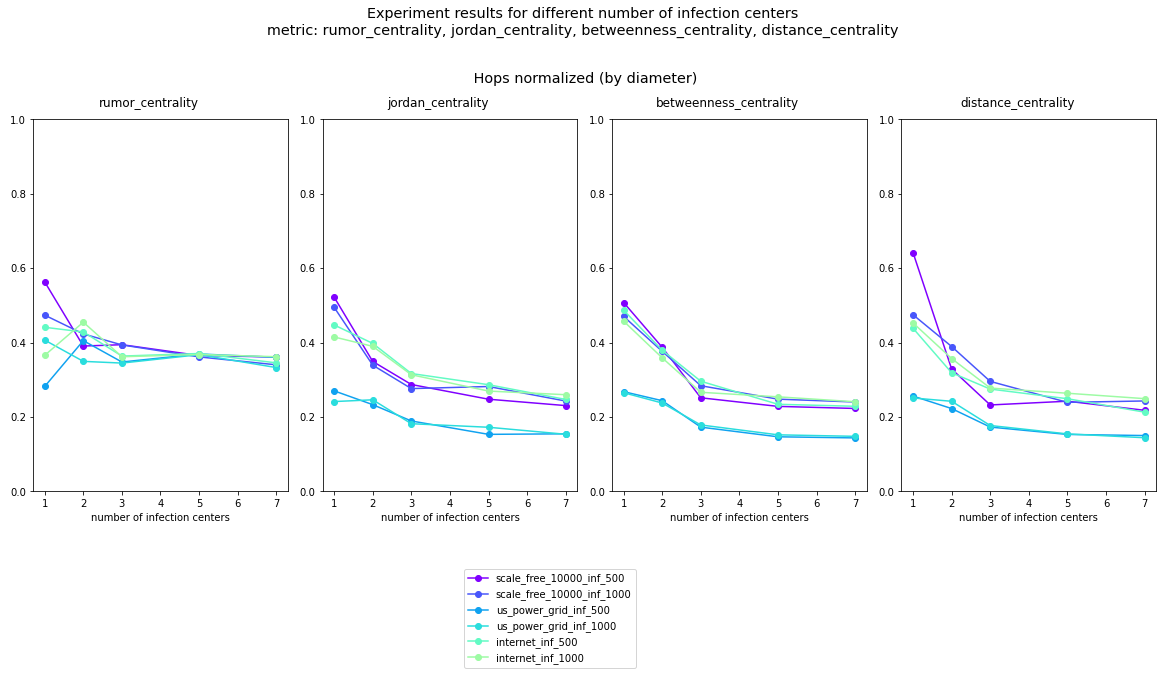

In [37]:
plot_multiple_compare_only_norm(["rumor_centrality", "jordan_centrality", "betweenness_centrality", "distance_centrality"], ["scale_free_10000", "us_power_grid", "internet"], [500, 1000])